# SHAPE
### Tech Test
#### Leonardo Lacerda Galler

#### Details:
The assignment involves an FPSO (Floating Production, Storage, and Offloading) vessel data, and we need your help with equipment failure data ingestion.
The FPSO vessel contains some equipment and each equipment have multiple sensors. Every time a failure happens, we get all the sensors data from the failed equipment, and we store this information in a log file (the time is in GMT time zone).

#### Expectations -  answer a few questions related to January 2020
1 – Total equipment failures that happened?

2 – Which equipment code had most failures?

3 – Average amount of failures across equipment group, ordered by the number of failures in ascending order?


### Accessing and describing the data

In [1]:
import pandas as pd
path_folder = "/home/jovyan/docker/dados/"

#### Reading the files and creating dataframes
    1. Reading the equipment file

In [2]:
equipemnt_df = pd.read_json(path_folder+"equipment.json", orient="records")
equipemnt_df

,equipment_id,code,group_name
0,1,5310B9D7,FGHQWR2Q
1,2,43B81579,VAPQY59S
2,3,E1AD07D4,FGHQWR2Q
3,4,ADE40E7F,9N127Z5P
4,5,78FFAD0C,9N127Z5P
5,6,9AD15F7E,PA92NCXZ
6,7,E54B5C3A,FGHQWR2Q
7,8,86083278,NQWPA8D3
8,9,3329175B,VAPQY59S
9,10,98B84035,NQWPA8D3


In [3]:
equipemnt_df.info

<bound method DataFrame.info of     equipment_id      code group_name
0              1  5310B9D7   FGHQWR2Q
1              2  43B81579   VAPQY59S
2              3  E1AD07D4   FGHQWR2Q
3              4  ADE40E7F   9N127Z5P
4              5  78FFAD0C   9N127Z5P
5              6  9AD15F7E   PA92NCXZ
6              7  E54B5C3A   FGHQWR2Q
7              8  86083278   NQWPA8D3
8              9  3329175B   VAPQY59S
9             10  98B84035   NQWPA8D3
10            11  09C37FB8   PA92NCXZ
11            12  CF304D24   FGHQWR2Q
12            13  4E834E81   Z9K1SAP4
13            14  2C195700   VAPQY59S>

    2. Reading the equipment_sensors

In [4]:
equip_sensor_df = pd.read_csv(path_folder+"equipment_sensors.csv", sep=";")
equip_sensor_df

,equipment_id,sensor_id
0,4,1
1,8,2
2,13,3
3,11,4
4,1,5
...,...,...
95,12,96
96,4,97
97,14,98
98,14,99


In [5]:
equip_sensor_df.info

<bound method DataFrame.info of     equipment_id  sensor_id
0              4          1
1              8          2
2             13          3
3             11          4
4              1          5
..           ...        ...
95            12         96
96             4         97
97            14         98
98            14         99
99             3        100

[100 rows x 2 columns]>

    3. Reading the log file (The log file is very complex and will need more attention)

In [6]:
# Read the current file
log_data = open(path_folder+"equipment_failure_sensors.log","r")

# Will create a new file
new_file = open(path_folder+"equipment_failure_sensors_new.log","a")

In [7]:
for line in log_data.readlines():
    new_file.write(line.replace("[","")\
        .replace("]","")\
        .replace("\t",";")\
        .replace("sensor","sensor ")\
        .replace("temperature;","temperature=")\
        .replace("vibration;","vibration=")\
        .replace(":;",";")\
        .replace("(","")\
        .replace(")","")\
        .replace(",",";"))

In [8]:
# Closing the connections
log_data.close()
new_file.close()

    4. After the initial wrangling of the log data, now we structure it more with pandas

In [9]:
equip_fail_sensors = pd.read_csv(path_folder+"equipment_failure_sensors_new.log", sep=";", names=["datetime","status","sensor","temperature","vibration"])
equip_fail_sensors

,datetime,status,sensor,temperature,vibration
0,2019-12-10 10:46:09,ERROR,sensor 5,temperature=365.26,vibration=-6305.32
1,2019-12-10 10:46:09,ERROR,sensor 43,temperature=458.47,vibration=-58.41
2,2019-12-10 10:46:09,ERROR,sensor 44,temperature=57.16,vibration=-999.66
3,2019-12-10 10:46:09,ERROR,sensor 67,temperature=106.69,vibration=-4659.02
4,2019-12-02 06:53:29,ERROR,sensor 5,temperature=26.42,vibration=-3438.67
...,...,...,...,...,...
36974,2019-12-09 09:26:38,ERROR,sensor 27,temperature=472.36,vibration=9660.13
36975,2019-12-09 09:26:38,ERROR,sensor 51,temperature=134.64,vibration=-736.71
36976,2019-12-09 09:26:38,ERROR,sensor 56,temperature=388.94,vibration=1237.49
36977,2019-12-09 09:26:38,ERROR,sensor 81,temperature=82.97,vibration=-1871.2


    5. For the columns sensor, temperature and vibration, we must keep just the values

In [10]:
# Columns sensor
equip_fail_sensors["sensor"] = equip_fail_sensors["sensor"].apply(lambda char: int(char.split(" ")[1]))

In [11]:
# Columns temperature
equip_fail_sensors["temperature"] = equip_fail_sensors["temperature"].apply(lambda char: char.split("=")[1])

# Convert to float
equip_fail_sensors["temperature"] = equip_fail_sensors["temperature"].apply(lambda toInt: float(toInt))

In [12]:
# Columns temperature
equip_fail_sensors["vibration"] = equip_fail_sensors["vibration"].apply(lambda char: char.split("=")[1])

# Convert to float
equip_fail_sensors["vibration"] = equip_fail_sensors["vibration"].apply(lambda toInt: float(toInt))

    6. Joining datasets to create an analytical one.
        Auxiliary dataframes:
        - equipemnt_df
        - equip_sensor_df
        - equip_fail_sensors(log)

In [13]:
# joining equipment and sensor dataframes
equip_sensor_join_df = equipemnt_df.set_index('equipment_id').join(equip_sensor_df.set_index('equipment_id'), how = "inner")

In [14]:
# Joining equip_sensor_join_df and equip_fail_sensor
equip_sensor_join_df.head()

,code,group_name,sensor_id
equipment_id,,,
1,5310B9D7,FGHQWR2Q,5
1,5310B9D7,FGHQWR2Q,43
1,5310B9D7,FGHQWR2Q,44
1,5310B9D7,FGHQWR2Q,67
2,43B81579,VAPQY59S,14


In [17]:
errors_by_equipment_final_df = equip_fail_sensors.set_index("sensor").join(equip_sensor_join_df.set_index("sensor_id"), on="sensor", how="inner", lsuffix="_caller")

In [18]:
# Converting the datetime column to datetime type
errors_by_equipment_final_df["datetime"] = errors_by_equipment_final_df["datetime"].apply(lambda str_ts: pd.to_datetime(str_ts))

#### Filtering the dataframe to January of 2020

In [78]:
errors_by_equipment_final_df_jan2020 = errors_by_equipment_final_df[errors_by_equipment_final_df.datetime.dt.strftime('%Y-%m') == '2020-01']

#### Transforming the datetime column

In [79]:
errors_by_equipment_final_df_jan2020['datetime_year_month'] = errors_by_equipment_final_df_jan2020.datetime.dt.strftime('%Y-%m')

/tmp/ipykernel_472/3105942243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_by_equipment_final_df_jan2020['datetime_year_month'] = errors_by_equipment_final_df_jan2020.datetime.dt.strftime('%Y-%m')


In [80]:
errors_by_equipment_final_df_jan2020['datetime_year_month_day'] = errors_by_equipment_final_df_jan2020.datetime.dt.strftime('%Y-%m-%d')

/tmp/ipykernel_472/1233139312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_by_equipment_final_df_jan2020['datetime_year_month_day'] = errors_by_equipment_final_df_jan2020.datetime.dt.strftime('%Y-%m-%d')


### Seeing information about the analytical dataframe

In [81]:
errors_by_equipment_final_df_jan2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11645 entries, 5 to 92
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   datetime                 11645 non-null  datetime64[ns]
 1   status                   11645 non-null  object        
 2   temperature              11645 non-null  float64       
 3   vibration                11645 non-null  float64       
 4   code                     11645 non-null  object        
 5   group_name               11645 non-null  object        
 6   datetime_year_month      11645 non-null  object        
 7   datetime_year_month_day  11645 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 818.8+ KB


In [82]:
errors_by_equipment_final_df_jan2020.describe()

,temperature,vibration
count,11645.000000,11645.000000
mean,249.556484,32.889951
std,144.453871,5758.554804
min,0.090000,-9999.980000
25%,124.770000,-4948.660000
50%,250.900000,30.380000
75%,374.070000,4967.700000
max,499.920000,9999.970000


#### Question 1 - Total equipment failures that happened?

In [83]:
print("On January 2020 we got "+str(errors_by_equipment_final_df_jan2020["status"].count())+" errors." )

On January 2020 we got 11645 errors.


#### Question 2 – Which equipment code had most failures?

<AxesSubplot:>

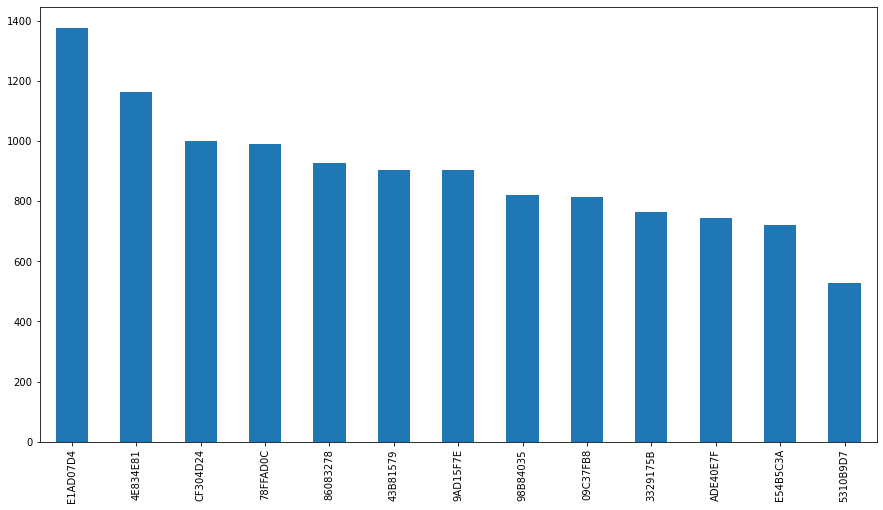

In [84]:
errors_by_equipment_final_df_jan2020["code"].value_counts().plot.bar(figsize=(15,8))

In [85]:
print("The equipment code who had most failures was "+str(errors_by_equipment_final_df_jan2020["code"].value_counts()[0:1]))

The equipment code who had most failures was E1AD07D4    1377
Name: code, dtype: int64


#### Question 3 – Average amount of failures across equipment group, ordered by the number of failures in ascending order?

In [104]:
# Creating a specific dataframe to answer the question
df_q3 = errors_by_equipment_final_df_jan2020.groupby(['datetime_year_month','datetime_year_month_day','group_name']) \
       .agg({'status':'count'}) \
       .rename(columns={'status':'# of Failures'}) #\
       #

In [121]:
df_q3_mean_month = df_q3.groupby(['datetime_year_month','group_name']) \
                      .agg({'# of Failures':'sum'}) \
                      .rename(columns={'# of Failures':'Total Failures'})

<AxesSubplot:title={'center':'Total number of failures within the month'}, xlabel='datetime_year_month,group_name'>

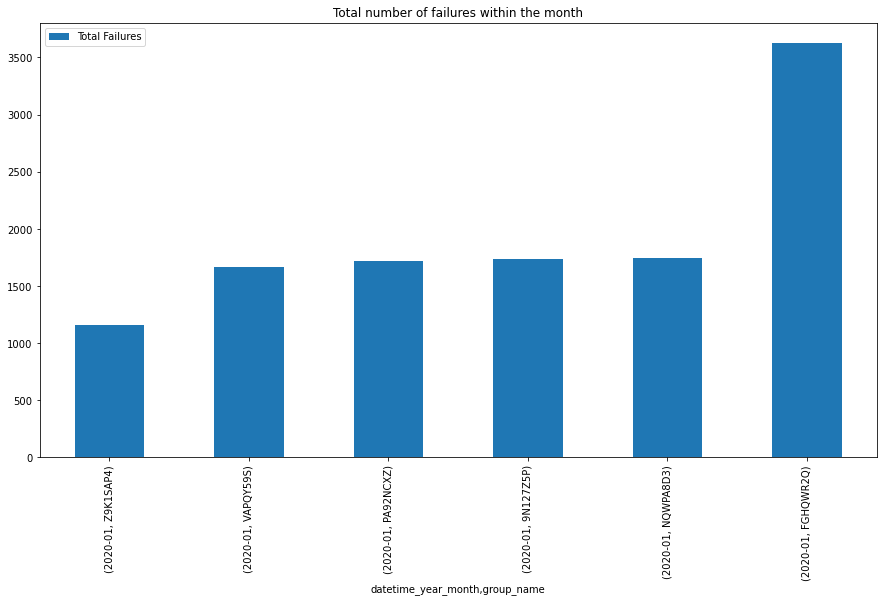

In [136]:
df_q3_mean_month.sort_values(by=['Total Failures','group_name'], ascending=True).plot.bar(figsize=(15,8), title="Total number of failures within the month")

In [118]:
df_q3_mean_day = df_q3.groupby(['datetime_year_month','group_name']) \
                      .agg({'# of Failures':'mean'}) \
                      .rename(columns={'# of Failures':'Avg # of Failures Per Day'})

<AxesSubplot:title={'center':'The average number of failures per day.'}, xlabel='datetime_year_month,group_name'>

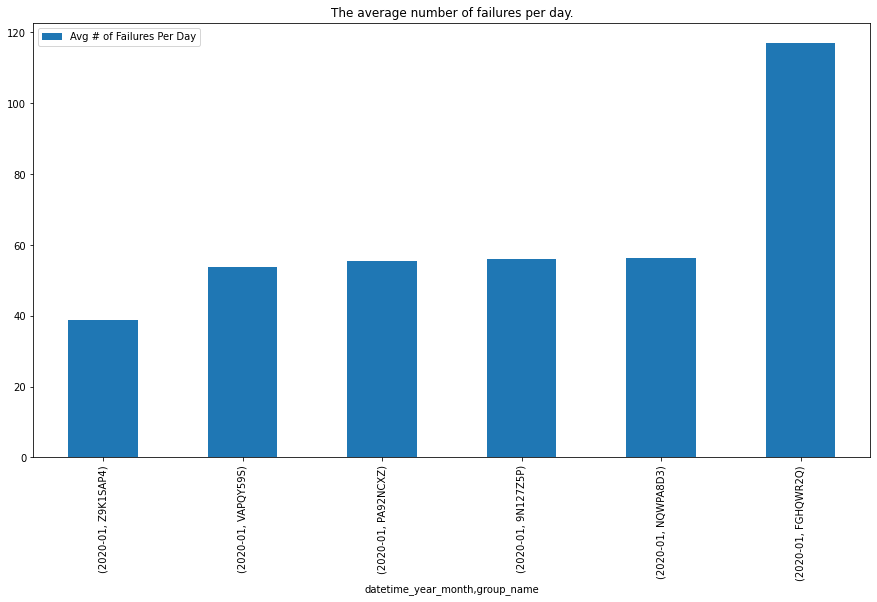

In [137]:
df_q3_mean_day.sort_values(by=['Avg # of Failures Per Day','group_name'], ascending=True).plot.bar(figsize=(15,8), title="The average number of failures per day.")